# MSA 2025 Phase 2 - Part 1

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them


** Load chosen datasets from the datasets folder into your notebook and display the first ten instances.
** Provide key statistical measures such as mean and standard deviation without hardcoding them.
* Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.
* Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

In [3]:
#
sales = pd.read_csv("data/raw/sales.csv")
print(sales.head(10))
print(sales["IsHoliday"].value_counts()) # approx 4/52 holiday weeks - could determine which ones / seperate based on D+M 
sales.describe().round(1)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False
False    391909
True      29661
Name: IsHoliday, dtype: int64


,Store,Dept,Weekly_Sales
count,421570.0,421570.0,421570.0
mean,22.2,44.3,15981.3
std,12.8,30.5,22711.2
min,1.0,1.0,-4988.9
25%,11.0,18.0,2079.6
50%,22.0,37.0,7612.0
75%,33.0,74.0,20205.9
max,45.0,99.0,693099.4


Store and Dept are practically categorical, but have a lot of catergories so one-hot encoding could lead to overfitting (each department store combo has n ~= 100). TODO compare with and without stores or deptartments.
IsHoliday is binary (so can convert to numeric no extra columns), but differentiating which holiday is which could be relevant? TODO possibly one-hot each holiday

([<matplotlib.axis.XTick at 0x28aecb86880>,
 [Text(0, 0, '2010-02-05'),
  Text(30, 0, '2010-09-03'),
  Text(60, 0, '2011-04-01'),
  Text(90, 0, '2011-10-28'),
  Text(120, 0, '2012-05-25')])

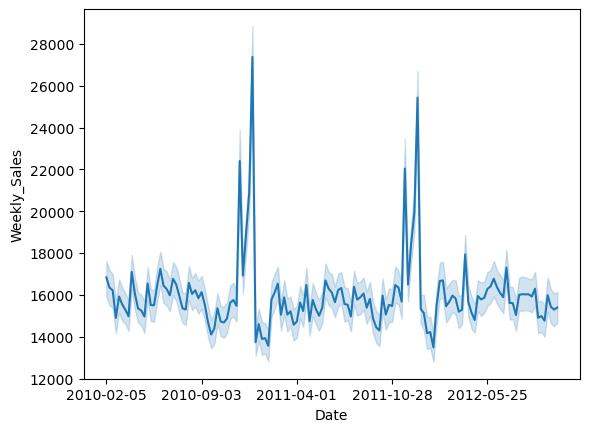

In [4]:
sns.lineplot(x='Date', y='Weekly_Sales', data=sales)
plt.xticks(ticks=range(0,142,30))

In [5]:
sales.loc[sales["IsHoliday"]]["Date"].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

- 10th-12th Febuary: President's Day or Valentines
- 7th-10th September: 911? 
- 25/26th November: Thanksgiving / Black Friday?
- 30/31st December: New Years 

In [21]:
sales["Weekly_Sales"].sort_values()

267730     -4988.94
336495     -3924.00
417801     -1750.00
153916     -1699.00
271300     -1321.48
            ...    
135665    474330.10
337961    627962.93
95425     630999.19
338013    649770.18
95373     693099.36
Name: Weekly_Sales, Length: 421570, dtype: float64

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

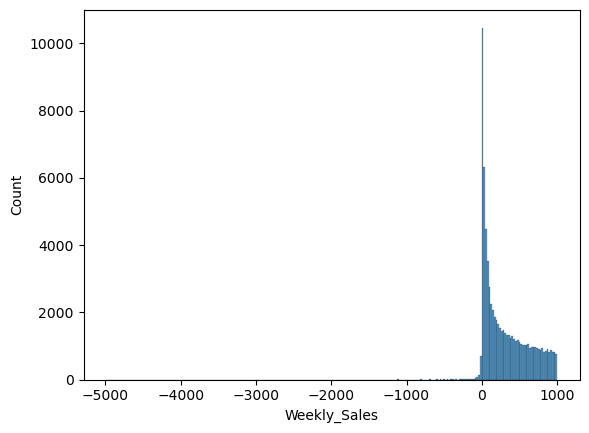

In [26]:
sns.histplot(sales.loc[sales["Weekly_Sales"] < 1000]["Weekly_Sales"])

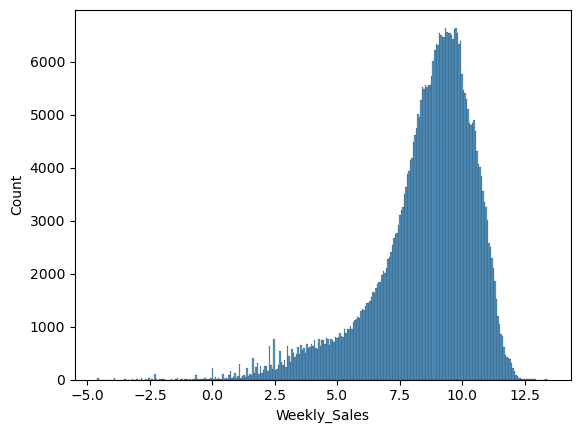

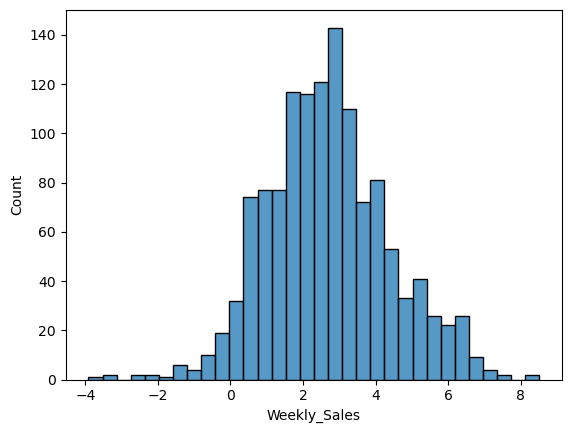

73


1285

In [24]:
sns.histplot(np.log(sales.loc[sales["Weekly_Sales"] > 0]["Weekly_Sales"]))
plt.show()
sns.histplot(np.log(-(sales.loc[sales["Weekly_Sales"] < -1e-10]["Weekly_Sales"])))
plt.show()
print(sum(sales["Weekly_Sales"]==0))
sum(sales["Weekly_Sales"]<0)




In [31]:
sales.loc[sales["Weekly_Sales"] > +1e-10]["Weekly_Sales"].mean()

16033.11459137293

In [28]:
sales.loc[sales["Weekly_Sales"] < -1e-10]["Weekly_Sales"].median()

-13.2

In [8]:
features = pd.read_csv("data/raw/features.csv")
print(features.head(10))
features.describe().round(1)

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   
5      1  2010-03-12        57.79       2.667        NaN        NaN   
6      1  2010-03-19        54.58       2.720        NaN        NaN   
7      1  2010-03-26        51.45       2.732        NaN        NaN   
8      1  2010-04-02        62.27       2.719        NaN        NaN   
9      1  2010-04-09        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       Tru

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.0,8190.0,8190.0,4032.0,2921.0,3613.0,3464.0,4050.0,7605.0,7605.0
mean,23.0,59.4,3.4,7032.4,3384.2,1760.1,3292.9,4132.2,172.5,7.8
std,13.0,18.7,0.4,9262.7,8793.6,11276.5,6792.3,13086.7,39.7,1.9
min,1.0,-7.3,2.5,-2781.4,-265.8,-179.3,0.2,-185.2,126.1,3.7
25%,12.0,45.9,3.0,1577.5,68.9,6.6,304.7,1440.8,132.4,6.6
50%,23.0,60.7,3.5,4743.6,364.6,36.3,1176.4,2727.1,182.8,7.8
75%,34.0,73.9,3.7,8923.3,2153.4,163.2,3310.0,4832.6,213.9,8.6
max,45.0,102.0,4.5,103185.0,104519.5,149483.3,67474.8,771448.1,229.0,14.3


Temperature is presumably Farenheit, 
Markdown columns are all more than half empty and are not ordered as numbering might imply (know this because count of 2 is less than count of 3). Sometimes negative so unclear what is being reffered to?
CPI and unemployment have approx 1/8 missing - IRL would supplement with another data source to fill these in - TODO check if its store or date based, if date based could do time series analysis on just these



([<matplotlib.axis.XTick at 0x28aee0d54f0>,
 [Text(0, 0, '2010-02-05'),
  Text(30, 0, '2010-09-03'),
  Text(60, 0, '2011-04-01'),
  Text(90, 0, '2011-10-28'),
  Text(120, 0, '2012-05-25')])

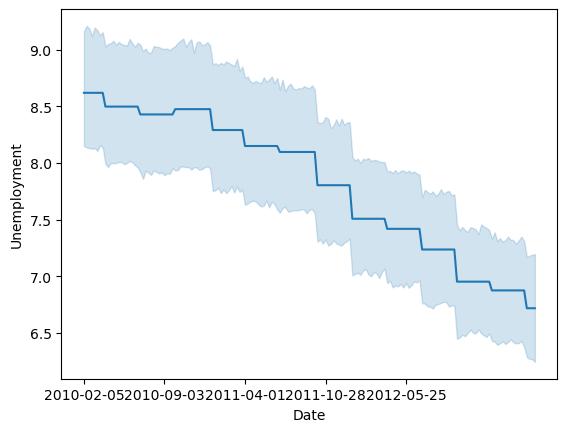

In [9]:
sns.lineplot(x='Date', y="Unemployment", data=features)

plt.xticks(ticks=range(0,142,30))

([<matplotlib.axis.XTick at 0x28af0df1fd0>,
 [Text(0, 0, '2010-02-05'),
  Text(30, 0, '2010-09-03'),
  Text(60, 0, '2011-04-01'),
  Text(90, 0, '2011-10-28'),
  Text(120, 0, '2012-05-25')])

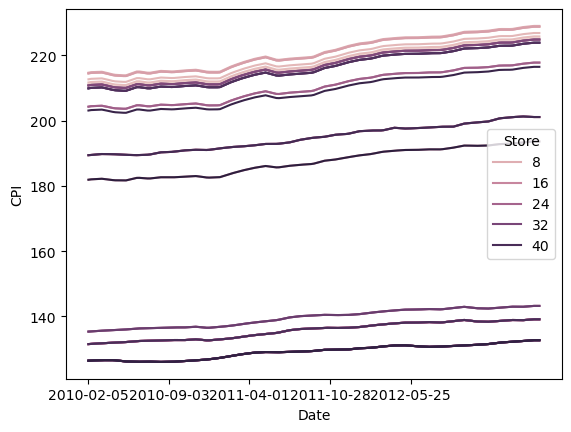

In [10]:
sns.lineplot(x='Date', y="CPI", data=features, hue="Store")
plt.xticks(ticks=range(0,142,30))

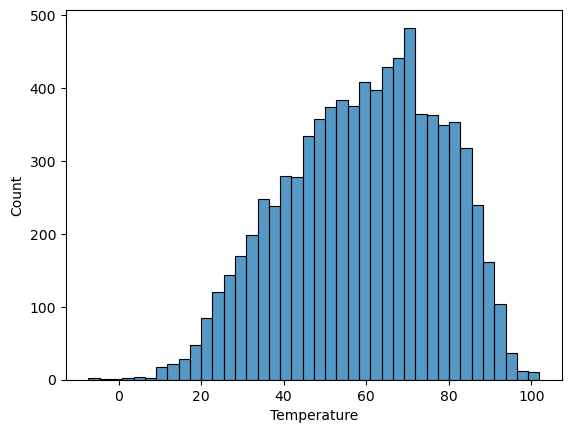

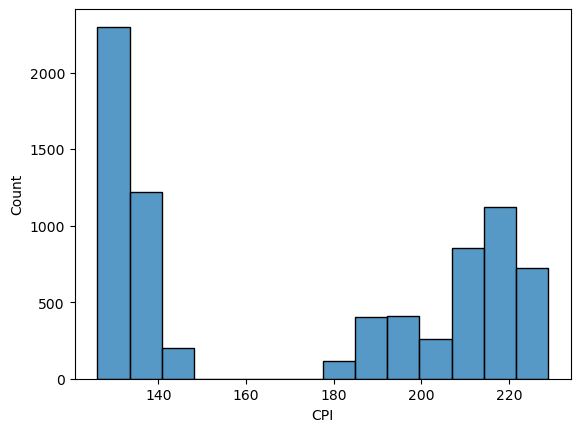

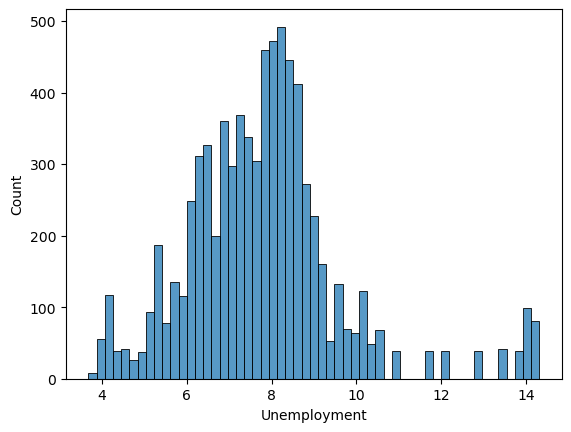

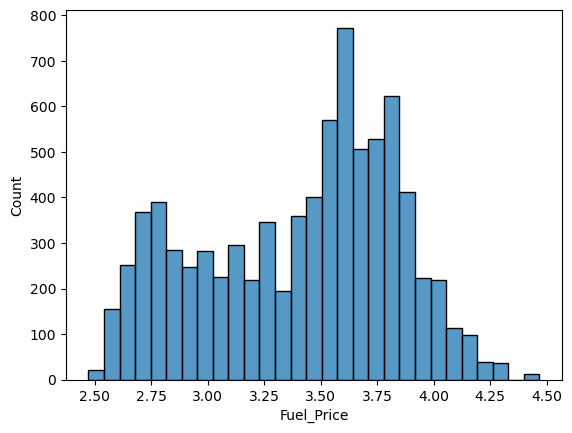

In [11]:
sns.histplot(features["Temperature"])
plt.show()
sns.histplot(features["CPI"])
plt.show()
sns.histplot(features["Unemployment"])
plt.show()
sns.histplot(features["Fuel_Price"])
plt.show()

c:\Users\jaqli\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: >

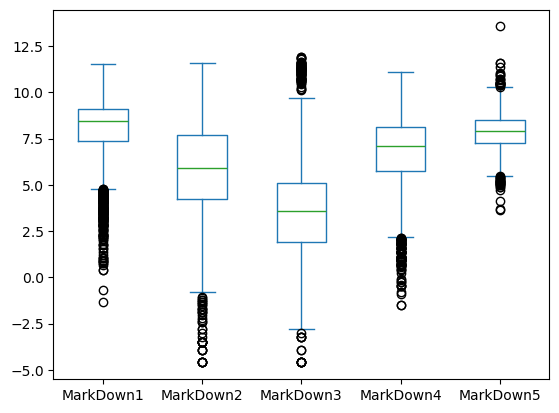

In [12]:
markdowns = np.log(np.abs(features.iloc[:, 4:9]))
markdowns.plot.box()

<Axes: >

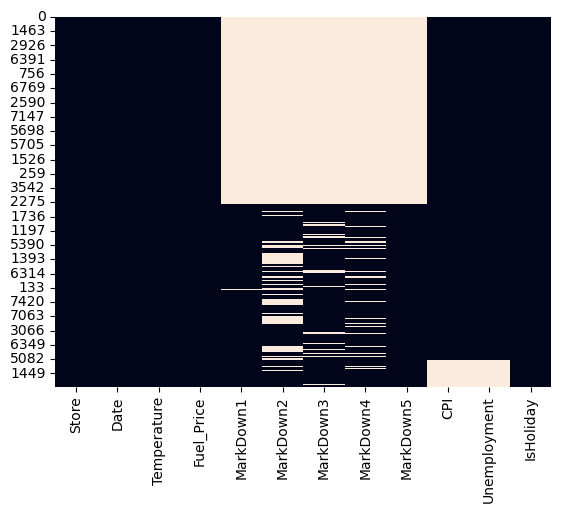

In [13]:
byDate = features.sort_values("Date")
sns.heatmap(byDate.isnull(), cbar=False)


In [14]:
stores = pd.read_csv("data/raw/stores.csv")
print(stores.head(10))
print(stores["Type"].value_counts())
stores.describe().round(1)


   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
5      6    A  202505
6      7    B   70713
7      8    A  155078
8      9    B  125833
9     10    B  126512
A    22
B    17
C     6
Name: Type, dtype: int64


,Store,Size
count,45.0,45.0
mean,23.0,130287.6
std,13.1,63825.3
min,1.0,34875.0
25%,12.0,70713.0
50%,23.0,126512.0
75%,34.0,202307.0
max,45.0,219622.0


Unbalanced store types against C. 

<Axes: xlabel='Size', ylabel='Count'>

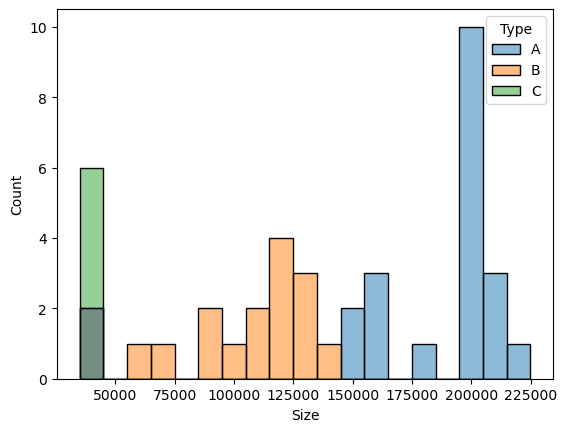

In [16]:
sns.histplot(data=stores, x="Size", hue = "Type", binwidth=10000)

In [ ]:
stores.loc[stores["Size"] < 50000]


,Store,Type,Size
2,3,B,37392
4,5,B,34875
29,30,C,42988
32,33,A,39690
35,36,A,39910
36,37,C,39910
37,38,C,39690
41,42,C,39690
42,43,C,41062
43,44,C,39910


In [15]:
# Convert Type to one-hot
stores = pd.get_dummies(stores)
stores.head()

,Store,Size,Type_A,Type_B,Type_C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


In [20]:
# combining dataframes into one master
combined = sales.join(stores.set_index("Store"), on = "Store")
combined = combined.merge(features, how = "left", on = ["Store", "Date"], suffixes=("", "_features"))
combined.drop("IsHoliday_features", axis = 1, inplace=True)
combined.head()
# sns.scatterplot(x="Size", y="Weekly_Sales", data = combined)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## 2. Visualise data

* Visualise the converted data from the task above and identify any trends, patterns, or anomalies.

* Note that there are many different ways to visualise data, so we recommend you go through the Microsoft Learn modules to see what kinds of visualisations you have learned about and create those (or something similar) for this task.

* If any columns of the raw data were already numeric, then you may not have modified them further and have already graphically shown them in the task above (in which case, skip this task for those columns, as we are only interested in how you visualise the non-numerical columns that you converted in the task above).

* Hint: You can choose to aggregate data into daily, weekly, monthly, quarterly and yearly for visualization and analysis purposes. Check this chapter from otexts for more information on visualizing time-series data.

* Make list of timeseries plots?

In [17]:
combined.columns[0:5]

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

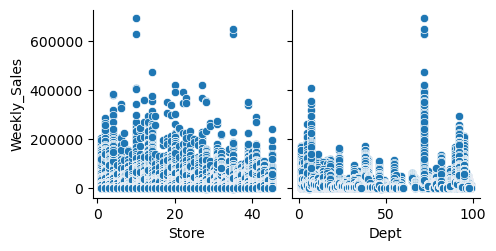

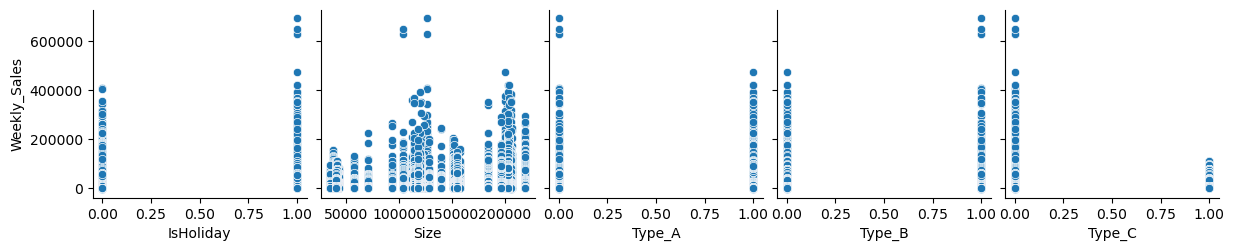

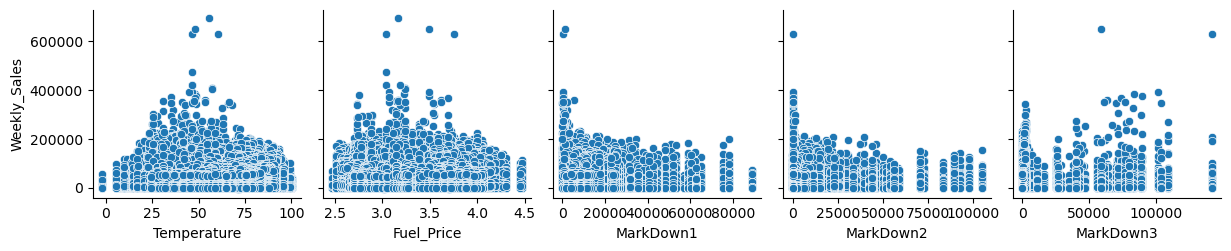

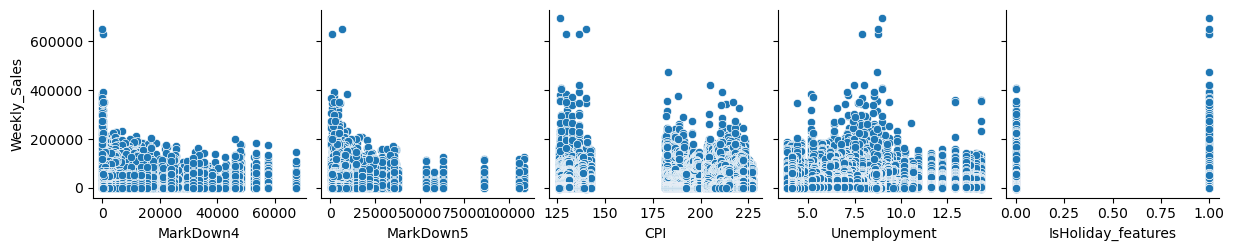

In [24]:
#
sns.pairplot(combined, y_vars=["Weekly_Sales"], x_vars=combined.columns[0:2])
plt.show()
sns.pairplot(combined, y_vars=["Weekly_Sales"], x_vars=combined.columns[4:9])
plt.show()
sns.pairplot(combined, y_vars=["Weekly_Sales"], x_vars=combined.columns[9:14])
plt.show()
sns.pairplot(combined, y_vars=["Weekly_Sales"], x_vars=combined.columns[14:20])


## 3. Clean data

* Missing values by dropping instances with missing values or entire attributes containing missing values, imputing the missing values for a particular attribute.
* Outliers by removing them and standardising/normalising them so that all our feature ranges are similar to each other, which helps our model learn better.
* Imbalanced data by undersampling/oversampling for a particular label.
* Feature selection by selecting the most important features to feed into our model while ignoring any insignificant features.

In [19]:
#

## 4. Identify correlated variables

* Find correlations between variables within each dataset to determine how each variable relates to the others.
* Identify and highlight any apparent relationships between variables.
* Drop/keep features that may depend on others while stating your reasoning.

In [20]:
#

## 5. Summary

## 6. Feature Selection/Engineering

* Use the results of your correlation analysis to select the most relevant features or create new ones.


? Perform any aspect of EDA or preprocessing in Power BI.
